<a id="top" style="float:left;" href="http://dynfluid.ensam.eu/"><img style="height:100px;" src="https://hpp.education/Lessons/omnes-docet-ubique.png"/></a>
<a style="float:right;" href="http://www.cnam.fr//"><img style="height:80px;" src="https://upload.wikimedia.org/wikipedia/commons/6/66/Logo_cnam.gif"/></a>
<center></center>

<center>
<h3 style="color:#888888;"> <i>--  AER213 - Fondamentaux de conception spatiale  --</i> </h3>
<h1> TN n°3 Eléments d'astronomie 3/3 </h1>
<h3> L'astrolabe </h3>
<h4> conception des éléments principaux </h4>
<h6>simon.marie@lecnam.net</h6>
</center>

In [3]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import datetime
import pandas as pd
import time 
#Option d'affichage et taille de police sur les figures:
fs=20
plt.rc('xtick',labelsize=fs)
plt.rc('ytick',labelsize=fs)
plt.rc('text', usetex=True)
plt.rcParams["font.family"] = "Ubuntu Mono"
%matplotlib inline   

<img style="height:500px;float:right" src="https://www.arts-et-metiers.net/sites/arts-et-metiers/files/2021-10/field_image-3116-p_03907-0000_bi2013_002.jpg"/>

On se propose dans ce TN, d'utiliser les connaissances acquises lors des 2 premiers TN pour construire les principaux éléments d'un <a href="https://fr.wikipedia.org/wiki/Astrolabe">astrolabe</a>. Cet instrument ancien datant de l'antiquité, a été utilisé jusqu'au 17ème siècle pour les calculs d'éphéméride astronomique et également pour connaitre l'heure locale en mesurant la hauteur du soleil dans le ciel ou celle d'une étoile visible la nuit.


Je vous conseille très fortement de visiter le <a href="https://www.arts-et-metiers.net/musee/astrolabe-par-arsenius">musée des Arts et Métiers</a> ou de nombreux astrolabes d'origine diverses sont exposés (Ci-contre l'Astrolabe d'Arsenius de 1569).

Ce TN doit vous permettre de mettre en oeuvre les différents éléments abordé dans le TN1 et le TN2. L'idée étant de construire succéssivement l'équation du temps rapportée à l'année civile, la projection stéréographique gravée sur les Tympans pour une latitude donnée ainsi que l'Araignée représentant les étoiles les plus brillante de l'hémisphère Nord.




# 1 - L'équation du temps

En reprenant les fonction du TN2 représenter dans un diagramme polaire l'équation du temps en minute en fonction des mois de l'année civile.

In [4]:
#Lattitude du point d'observation
Lat=48.8

# Longitude pour la correction horaire
long=2.47

# Calendrier
N=np.arange(1,366)
N1=np.cumsum([1,31,28,31,30,31,30,31,31,30,31,30]);
N5=N1+4
N10=N1+9
N15=N1+14
N20=N1+19
N25=N1+24
Nminticks=2*np.pi*(np.sort([N5,N10,N15,N20,N25])[0]-80)/365
Nminticks[Nminticks<0]=2*np.pi+Nminticks[Nminticks<0]
#Longitude Ecliptique
long_eq=2*np.pi*(N-80)/365
long_eq[long_eq<0]=2*np.pi+long_eq[long_eq<0]  # !! Il faut fournir un vecteur de donnée positives pour polar()

long_eq1=2*np.pi*(N1-80)/365
long_eq1[long_eq1<0]=2*np.pi+long_eq1[long_eq1<0]

In [5]:
def Hsol(N,L):
    long_ec=2*np.pi*(N+10)/365
    delta=23.44*np.cos(long_ec)
    return 90-L-delta

def Real_time_eq(L,N):
    rad=np.pi/180
    # Ecart au 1er Janvier de l'époque J2000:
    d0=(datetime.date(2022,1,1)-datetime.date(2000,1,1)).days
    N=N+d0
    M=357.5291+0.98560028*N
    #Excentricité de l'orbite  Terrestre
    e=0.01671
    #Obliquité
    eps=23.43929
    C=(2*e-0.25*e**3)*np.sin(M*rad)+1.25*e**2*np.sin(2*M*rad)+(13/12)*e**3*np.sin(3*M*rad)
    l=280.4665+0.98564736*N+C
    y=np.tan(eps*rad/2)
    R=-y**2*np.sin(2*l*rad)+0.5*y**4*np.sin(4*l*rad)-(y**6/3)*np.sin(6*l*rad)
    T=60*(C+R)
    #Hauteur solaire
    P=Hsol(N,L)
    return 4*T,P
                                                                                                                                                                                                                                                                      

month=['Jan','Fev','Mar','Avr','Mai','Juin','Juil','Aout','Sep','Oct','Nov','Dec']

/tmp/ipykernel_2813936/2292059270.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.xticks(ticks=Nminticks,labels=['' for p in Nminticks], minor=True)
/tmp/ipykernel_2813936/2292059270.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.yticks(ticks=np.arange(-18,16,2),labels=['' for p in range(-18,16,2)],minor=True)


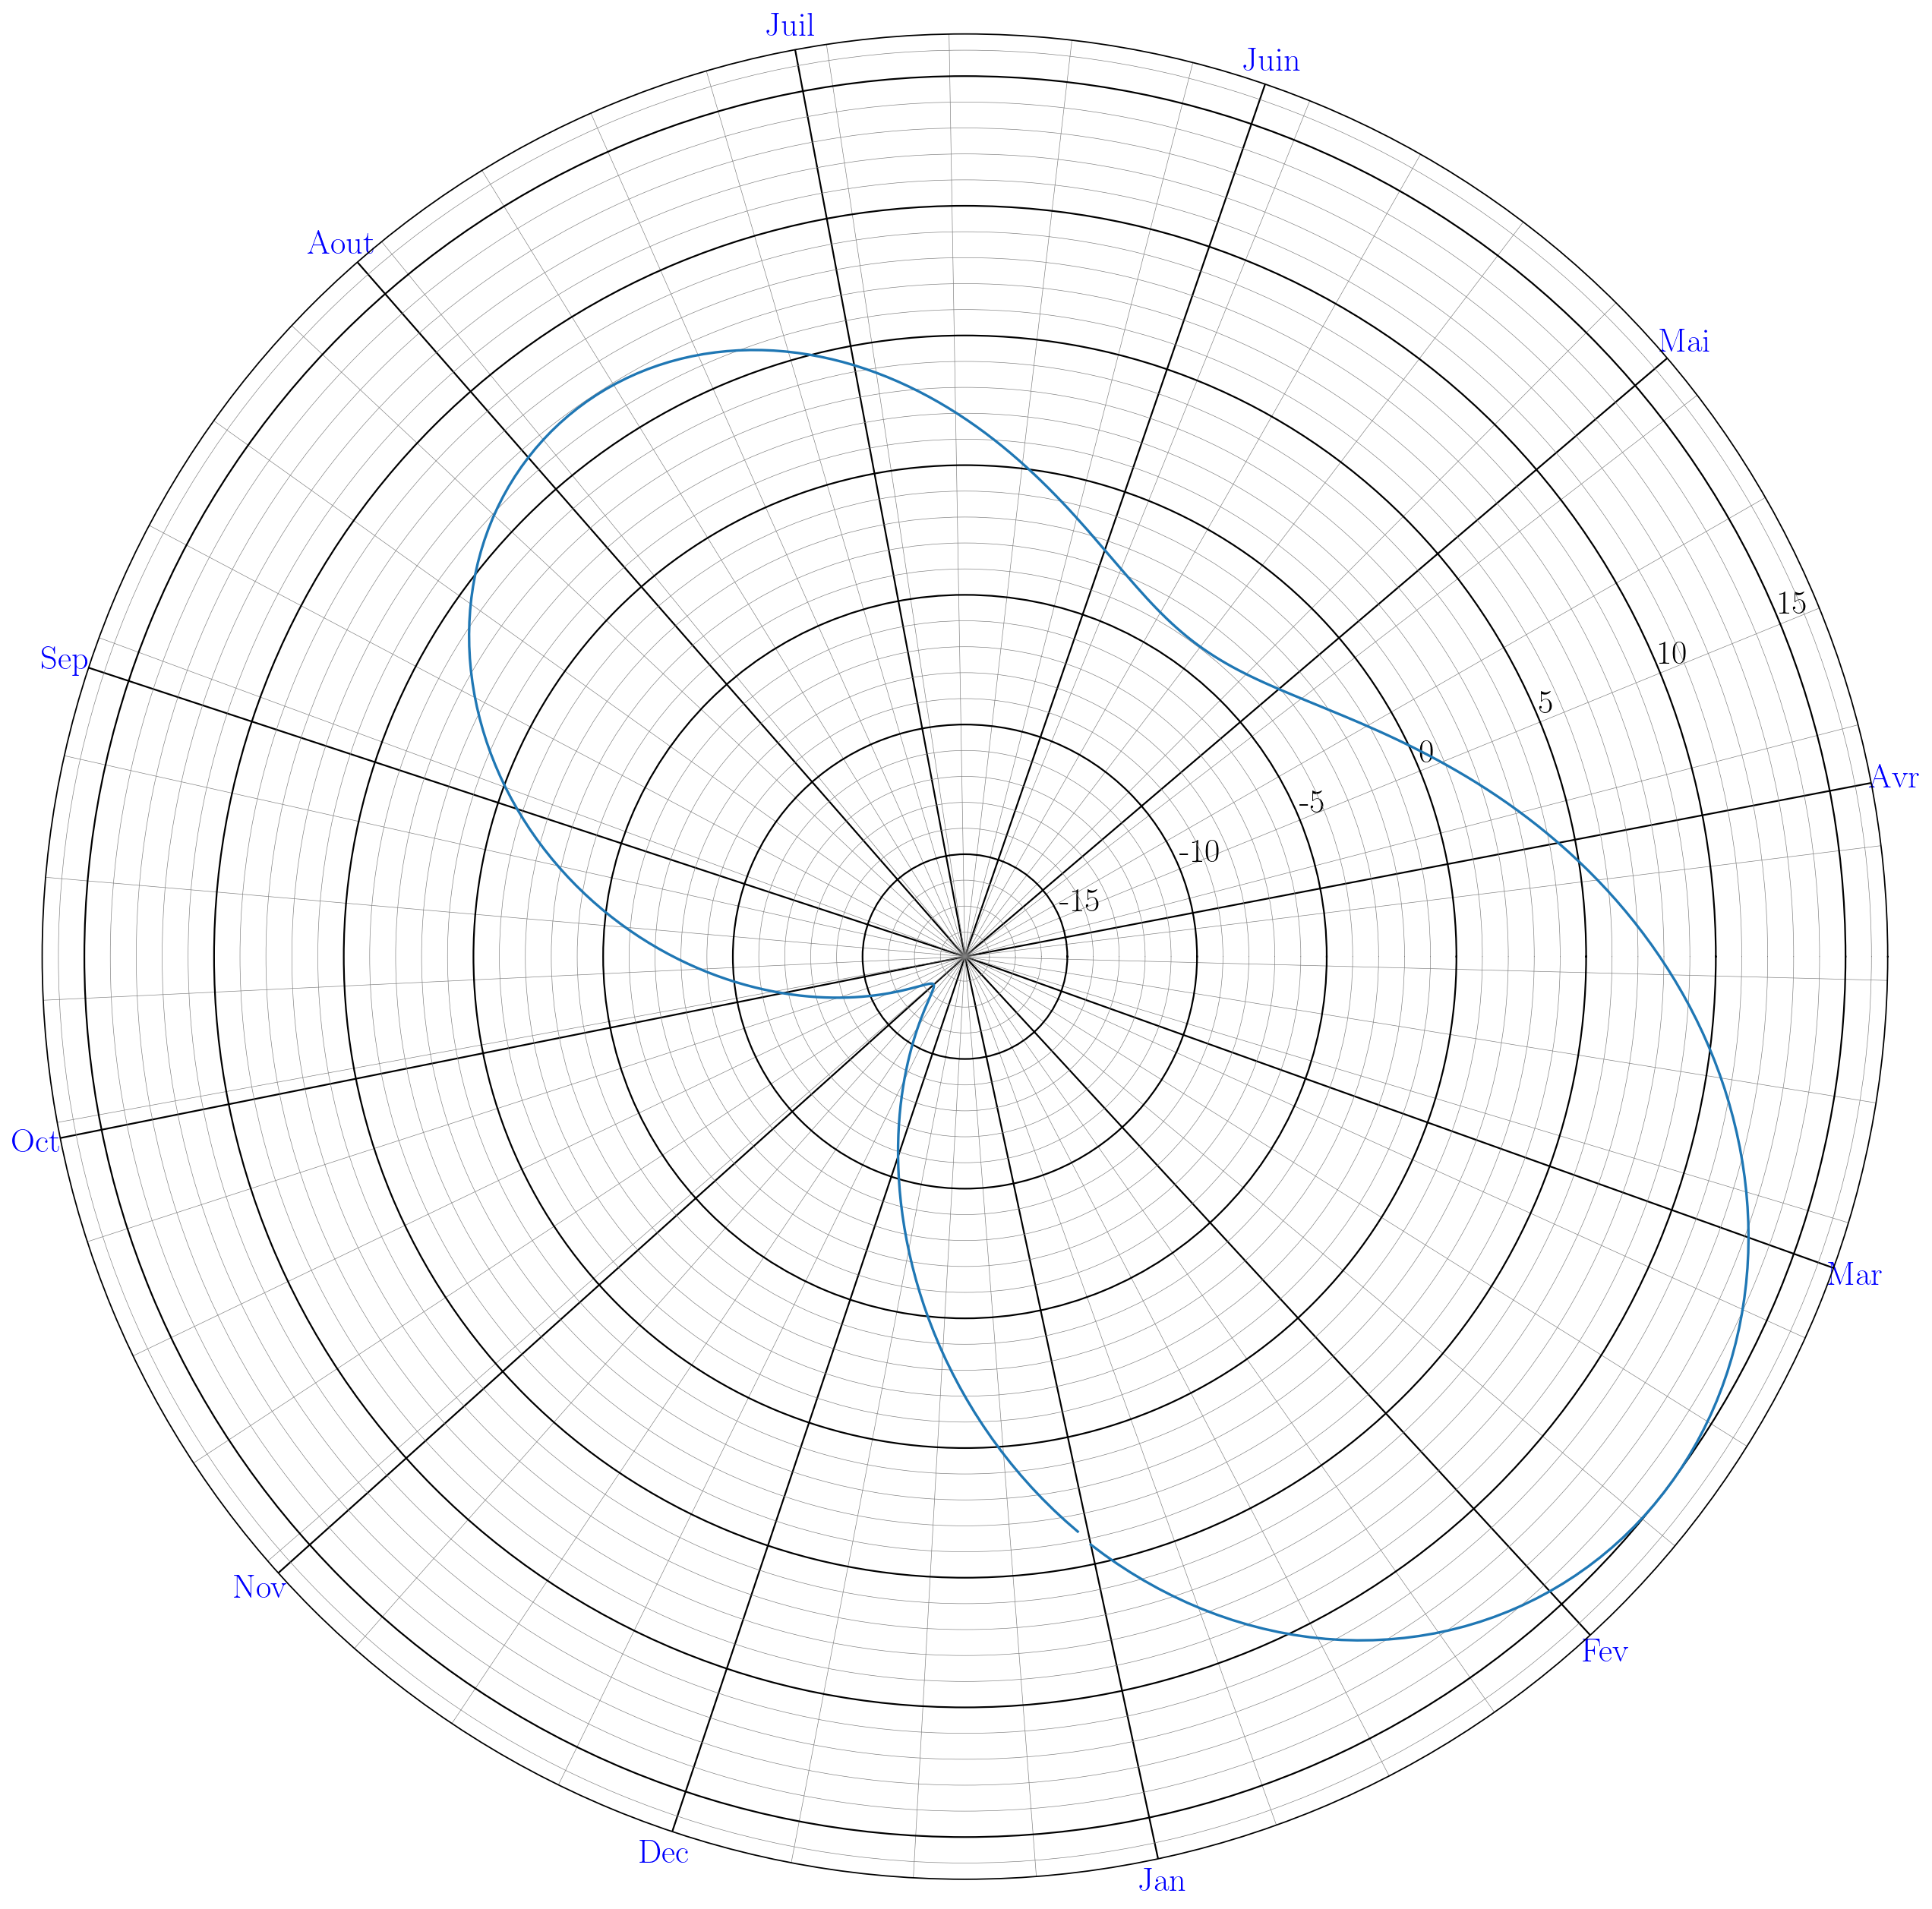

In [6]:
fig=plt.figure(figsize=(16,16), tight_layout=True, linewidth=2,dpi=160)
ax=fig.add_subplot(111,projection='polar')
ax.set_theta_zero_location('E')#Angle 0 en haut
plt.xticks(ticks=Nminticks,labels=['' for p in Nminticks], minor=True)
plt.xticks(ticks=long_eq1,labels=month, fontsize=fs,color='b')
plt.yticks(ticks=np.arange(-18,16,2),labels=['' for p in range(-18,16,2)],minor=True)
plt.yticks(ticks=[-15,-10,-5,0,5,10,15],labels=['-15','-10','-5','0','5','10','15'],fontsize=fs)

# Pour l'équation du temps on trace le Delta T 
# obtenu par la fonction du TN2 en fonction de la lattitude ecliptique
plt.plot(long_eq,Real_time_eq(Lat,N)[0])

plt.minorticks_on()
ax.yaxis.grid(True,which='major', color='k', linestyle='-',lw=1.)
ax.yaxis.grid(True,which='minor', color='gray', linestyle='-',lw=0.3)

ax.xaxis.grid(True,which='major', color='k', linestyle='-',lw=1.)
ax.xaxis.grid(True,which='minor', color='gray', linestyle='-',lw=0.3)
#plt.ylim(-30,30)
plt.savefig('Eq_tps.pdf',bbox_inches='tight',dpi=160)

# 2 - Projection Stéréographique

La seconde partie est le coeur de l'astrolabe. C'est le Tympan, il indique les graduations des déclinaisons en fonction de l'azimute et donc de l'heure de la journée.  Pour représenter ces graduations on utilise la <a href="https://fr.wikipedia.org/wiki/Projection_st%C3%A9r%C3%A9ographique">projection stéréographique</a> qui permet de représenter une sphère sur un plan.

Un point dans le ciel observé depuis une latitude $\phi$ ayant des coordonées locales $(hauteur, azimute)=(h,\Theta)$ se projette sur la cercle de rayon $R$ et de centre $(0,y_c)$:

$$
(R,y_c)=\left(\dfrac{\cos(h)}{\sin(\phi)+\sin(h)},\dfrac{\cos(\phi)}{\sin(\phi)+\sin(h)}\right)
$$

**En utilisant les liens fourni, retrouver la formule précédente pour la projection stéréographique**

**Représenter les cercles de projection de hauteur et d'azimute tous les 5 degrès**

In [7]:
# Vecteur des hauteur 0...90
high=np.arange(0,91,5)*np.pi/180

# Vecteur des azimutes 5..360
azimut=np.arange(5,365,5)*np.pi/180

# Vecteur radial pour la représentation
theta=np.linspace(0,2*np.pi,150)

# Latitude en radians
phi=Lat*np.pi/180

In [8]:
# Fonction tracant le cerle de centre *center* de rayon *radius*
# angle_pos correspond à la description radiale
def circle(ax,center, radius,angle_pos,color='k',lw=1.):
    x = radius * np.cos( angle_pos ) 
    y = radius * np.sin( angle_pos ) 
    ax.plot( x-center[0], center[1]-y,color,linewidth=lw ) 
    

(-8.0, 8.0)

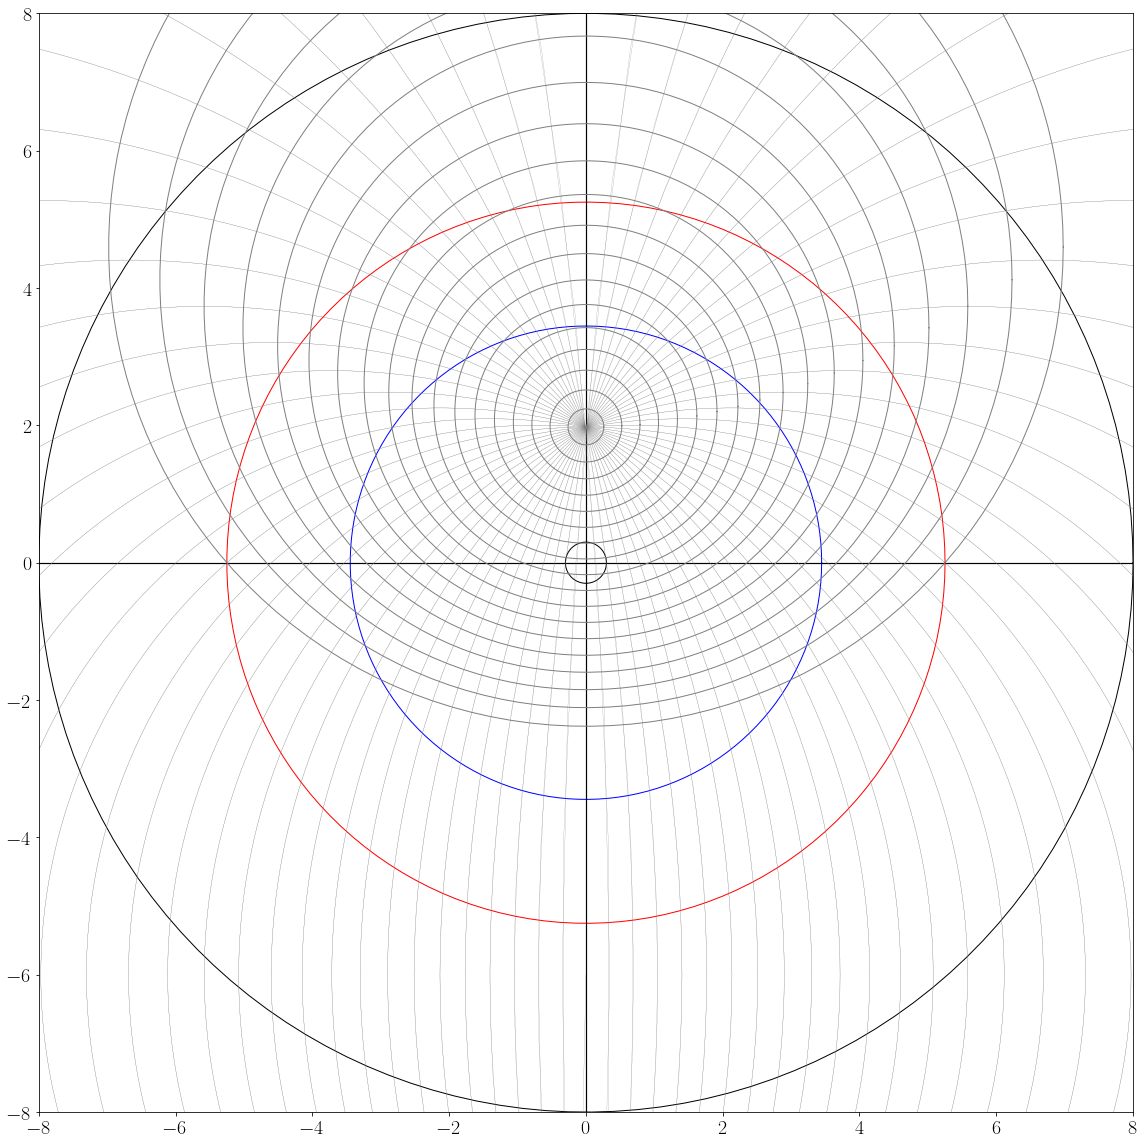

In [16]:
fig=plt.figure(figsize=(16,16), tight_layout=True, linewidth=2)
ax=fig.add_subplot(111)

inclination_ecliptic = 23.44

# Rayon externe de l'astrolabe
r1 = 10 

# Tracer du tropique du capricorne
r2 = 0.8*r1 
circle(ax,[0,0], r2,theta)

# Tracer du petit cercle centrale
r3 = 0.03*r1
circle(ax,[0,0], r3,theta)

# Tracer de l'equateur
r4 = r2 * np.tan((90 - inclination_ecliptic) / 2 * np.pi/180) # Rayon de l'équateur
circle(ax,[0,0], r4,theta,color='r')
    
# Tracer du tropique du Cancer
r5 = r4 * np.tan((90 - inclination_ecliptic) / 2 * np.pi/180)
circle(ax,[0,0], r5,theta,color='b')

# Tracer des lignes centrales
plt.plot([0,0],[-r2,r2],'k',lw=1.2)
plt.plot([-r2,r2],[0,0],'k',lw=1.2)

# Tracer des lignes d'égales altitude
for altitude in [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85]:
    theta1 = (-Lat - (90 - altitude)) * np.pi/180
    theta2 = (-Lat + (90 - altitude)) * np.pi/180

    x1 = r4 * np.sin(theta1)
    y1 = r4 * np.cos(theta1)
    x2 = r4 * np.sin(theta2)
    y2 = r4 * np.cos(theta2)
    ya = y1 * (r4 / (r4 - x1))
    yb = y2 * (r4 / (r4 - x2))

    # Record centre and radius of the arc denoting the horizon
    if altitude == 0:
        horizon_centre = (ya + yb) / 2
        horizon_radius = (yb - ya) / 2
    circle(ax,[0,(ya + yb) / 2],(yb - ya) / 2,theta,color='gray')

# Tracer des lignes d'égales azimutes
for a in azimut:
    xc=-r4*np.cos(a)/(np.sin(a)*np.cos(phi))
    yc=-r4*np.tan(phi)
    r=r4/(np.sin(a)*np.cos(phi))
    circle(ax,[xc,yc], r,theta,'gray',lw=0.2)
    
plt.xlim(-r2,r2)
plt.ylim(-r2,r2)

# 3 - Carte du Ciel

La dernière étape consiste à représenter l'araignée, c'est à dire la carte du ciel et l'écliptique.
Pour cela on pourra reprendre le fichier *Simbad_starsV6.txt* du TN1:

In [11]:
VStar=pd.read_csv('Simbad_starsV6.txt',delimiter='|')

**Tracer les 20 étoiles les plus brillantes du ciel à l'aide de leurs coordonnées équatoriales et représenter l'écliptique en rouge**

(-90.0, 30.0)

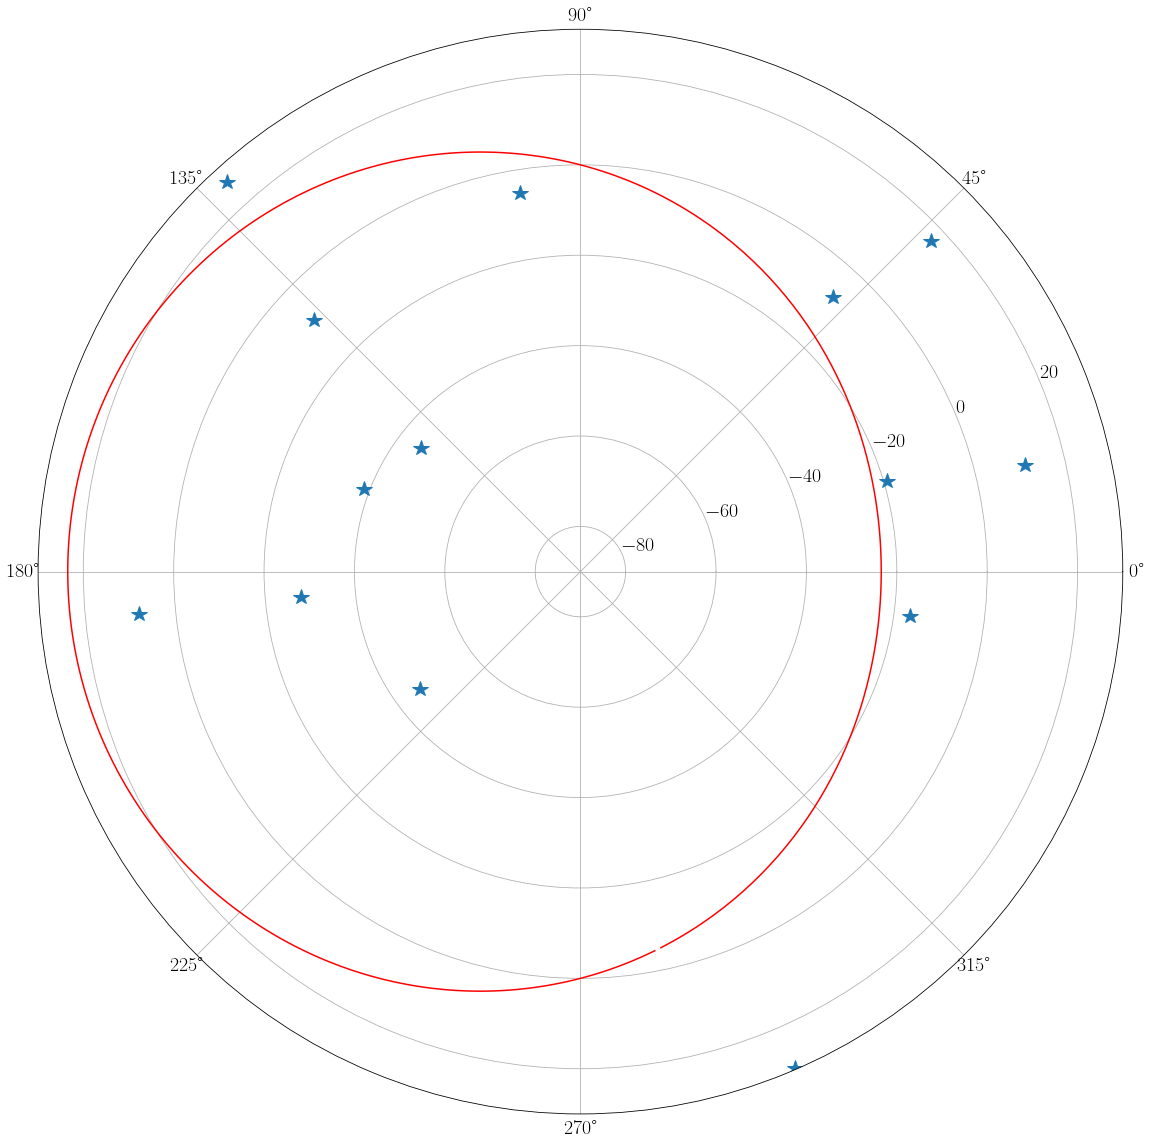

In [12]:
selec=VStar.sort_values('MagV',)[:20]
Ecliptique=23.44*np.cos(long_eq)

fig=plt.figure(figsize=(16,16), tight_layout=True, linewidth=2)
ax=fig.add_subplot(111,projection='polar')

plt.plot(selec['RA'],-selec['dec'],'*',markersize=16.)
plt.plot(long_eq,-Ecliptique,'r')
plt.grid(True);plt.ylim(-90,30)

Vous pouvez trouver un simulateur d'Astrolabe <a href="https://www.astrolabeproject.com/sim/astrolabe/sim.html">ICI</a>, à la latitude de Madrid.

Brigitte ALIX, réalise des Astrolabes modernes (c'est à dire avec la version actuelle du zodiaque et le point vernal dans les Poisson) [<a href="https://astrodescartes.fr/wp-content/uploads/2018/11/L_astrolabe-projection-et-lectures.pdf">Presentation</a>], son <a href="http://astrolabes.fr/">site</a> commercialise de nombreux objets.


---

In [1]:
from IPython.core.display import HTML
style=open('notebooks.css', "r").read()
HTML(style)

<a id="top" style="float:left;" href="http://dynfluid.ensam.eu/"><img style="height:100px;" src="https://hpp.education/Lessons/omnes-docet-ubique.png"/></a>
<a style="float:right;" href="http://www.cnam.fr//"><img style="height:80px;" src="https://upload.wikimedia.org/wikipedia/commons/6/66/Logo_cnam.gif"/></a>
<center><a href="#top">Retour en haut de la page</a></center>